# Task 2 : Iris Flower Classification
## task Description:- 
* The Objective: The goal of this project is to develop a machine learning model for the classification of Iris flowers based on their sepal and petal measurements.
* The Dataset: The Iris dataset contains three different species of Iris flowers: Versicolor, Setosa, and Virginica. Each species is characterized by four features: ‘Sepal length’, ‘Sepal width’, ‘Petal length’, and 'Petal widt’
* The Data Exploration: Start by loading the Iris dataset and exploring it. Understand the distribution of different classes (species) and the relationship between different features of the flowers
t.3.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [42]:
iris_data=pd.read_csv('IRIS.CSV')

In [43]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [45]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [46]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
iris_data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [50]:
iris_data['species']=iris_data['species'].str.replace('Iris-','')
iris_data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'Sepal Length Distribution')

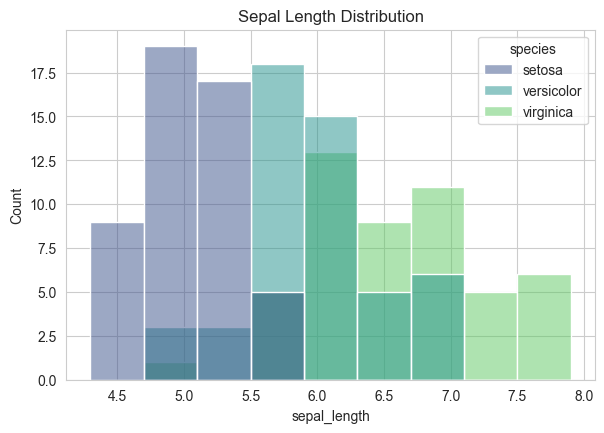

In [68]:
palette = "viridis"

plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.histplot(data=iris_data, x="sepal_length", hue="species", palette=palette)
plt.title("Sepal Length Distribution")



Text(0.5, 1.0, 'Sepal Width Distribution')

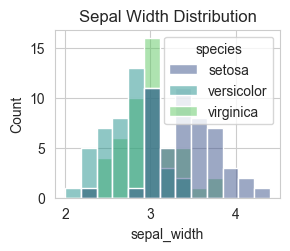

In [69]:
plt.subplot(2, 2, 2)
sns.histplot(data=iris_data, x="sepal_width", hue="species", palette=palette)
plt.title("Sepal Width Distribution")

Text(0.5, 1.0, 'Petal Length Distribution')

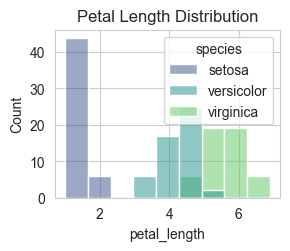

In [54]:
plt.subplot(2, 2, 3)
sns.histplot(data=iris_data, x="petal_length", hue="species", palette=palette)
plt.title("Petal Length Distribution")


Text(0.5, 1.0, 'Petal Width Distribution')

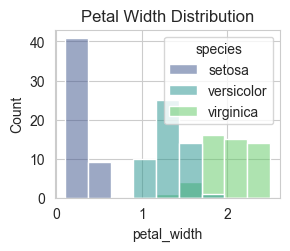

In [55]:
plt.subplot(2, 2, 4)
sns.histplot(data=iris_data, x="petal_width", hue="species", palette=palette)
plt.title("Petal Width Distribution")


In [56]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Sepal Length Box Plot')

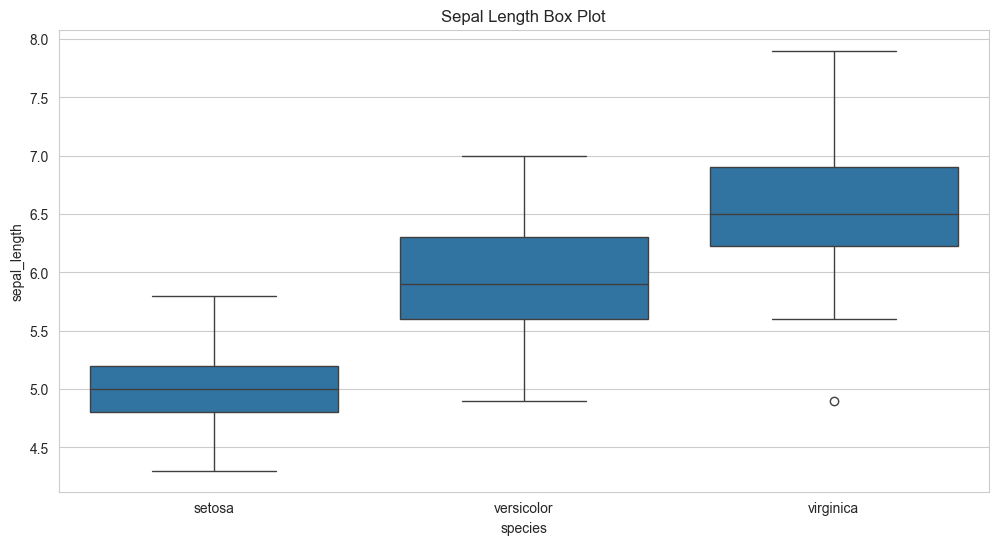

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_data, x="species", y="sepal_length")
plt.title("Sepal Length Box Plot")

Text(0.5, 1.0, 'Sepal Width Box Plot')

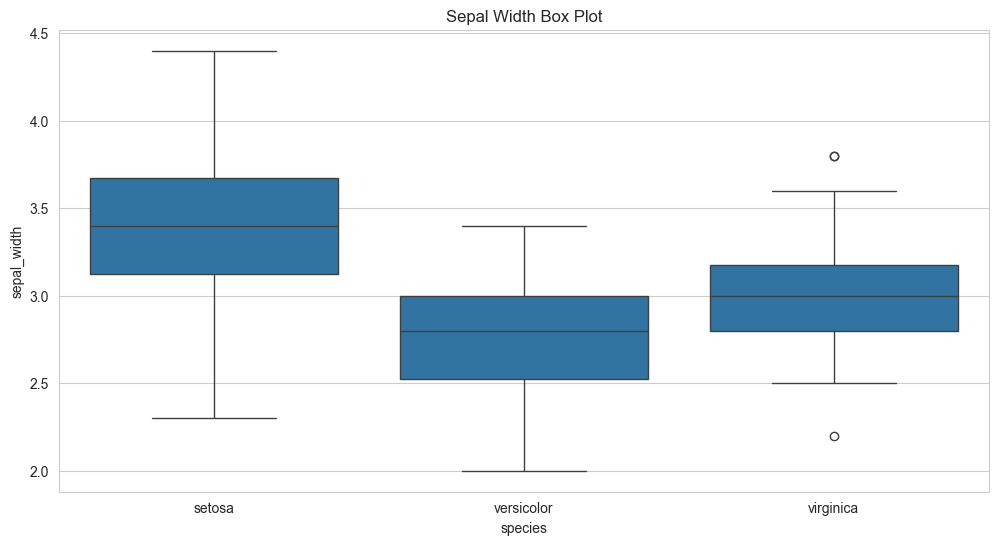

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_data, x="species", y="sepal_width")
plt.title("Sepal Width Box Plot")

Text(0.5, 1.0, 'Petal Length Box Plot')

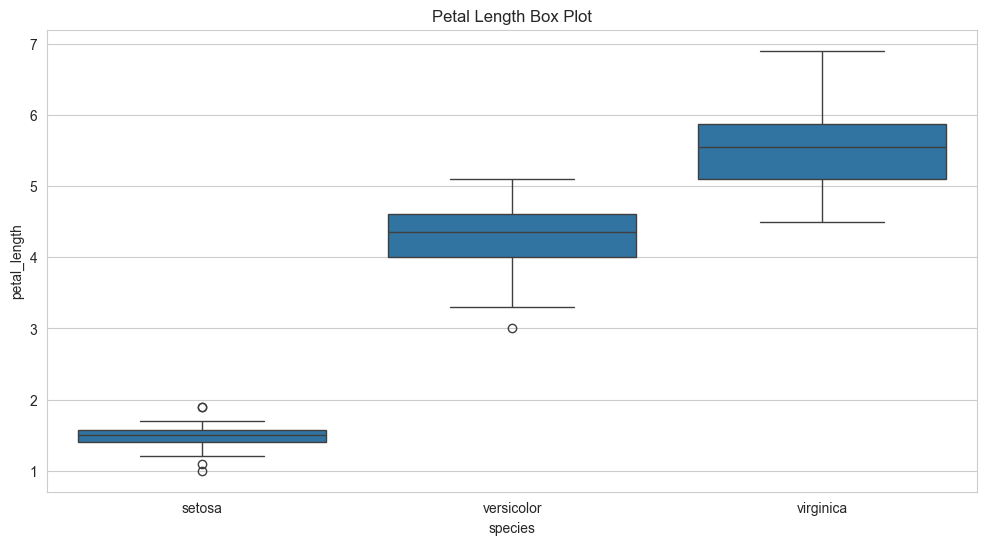

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_data, x="species", y="petal_length")
plt.title("Petal Length Box Plot")

Text(0.5, 1.0, 'Petal Width Box Plot')

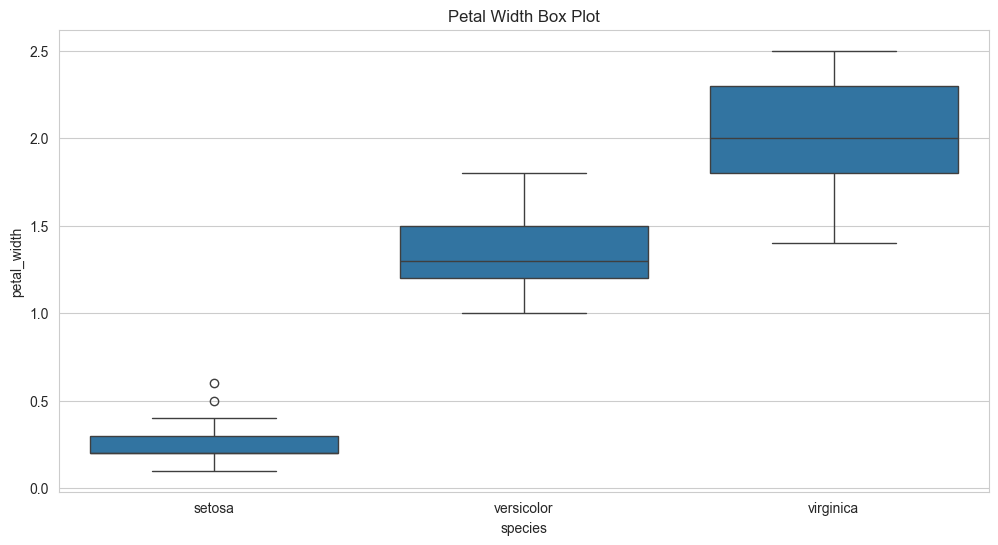

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_data, x="species", y="petal_width")
plt.title("Petal Width Box Plot")


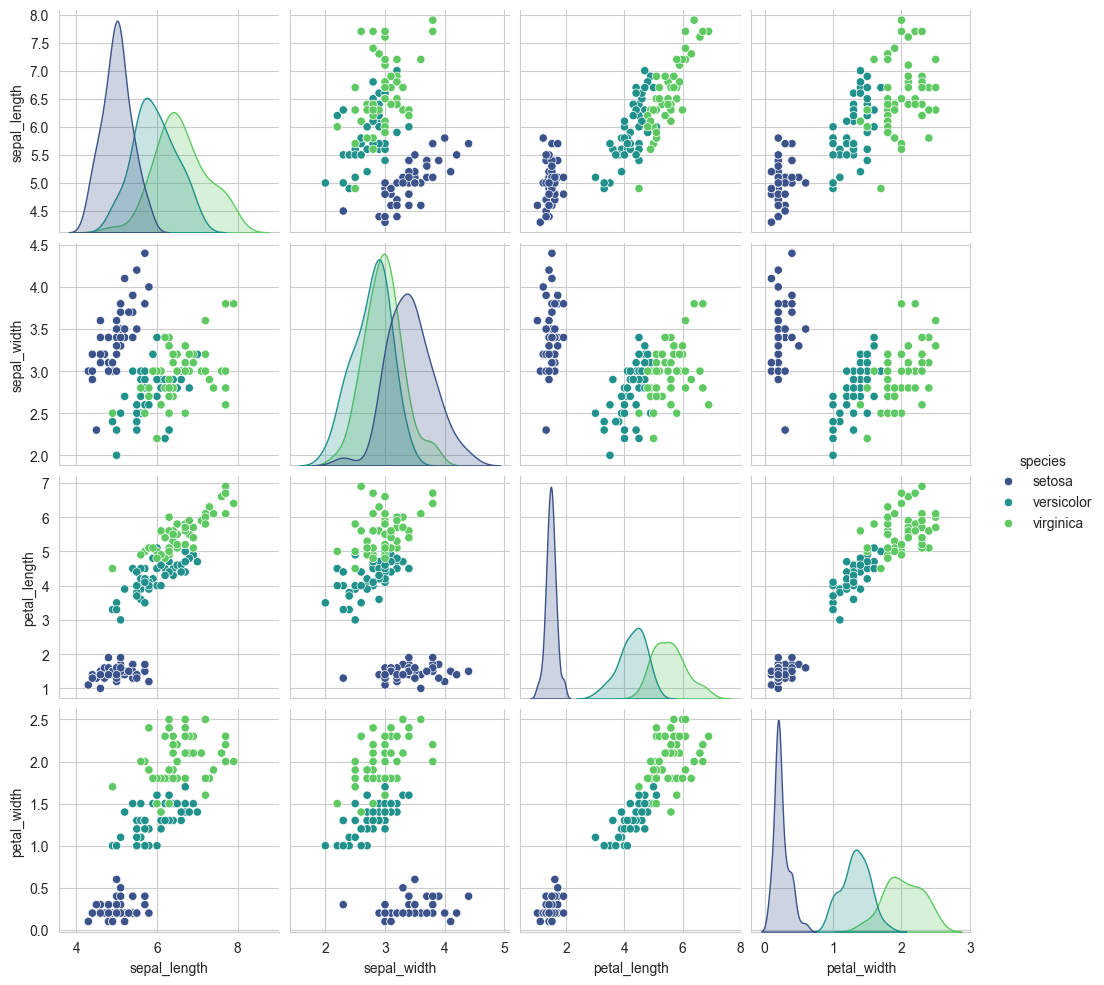

In [63]:
sns.set_style('whitegrid')
sns.pairplot(iris_data, hue='species', palette=palette)
plt.show()

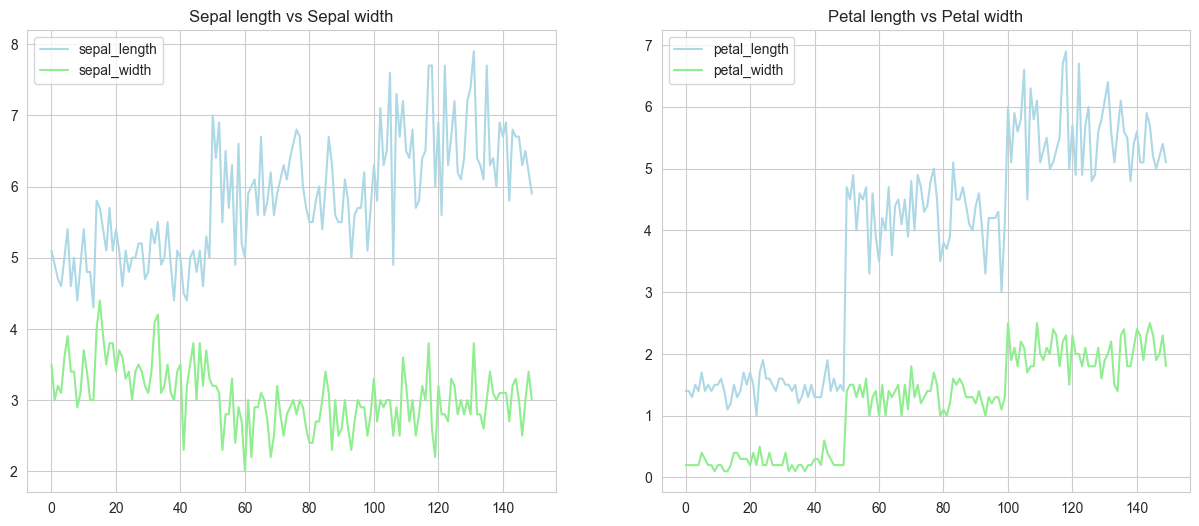

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(iris_data['sepal_length'], label='sepal_length',color='lightblue')
ax[0].plot(iris_data['sepal_width'], label='sepal_width',color='lightgreen')
ax[0].set_title('Sepal length vs Sepal width')
ax[0].legend()

ax[1].plot(iris_data['petal_length'], label='petal_length',color='lightblue')
ax[1].plot(iris_data['petal_width'], label='petal_width',color='lightgreen')
ax[1].set_title('Petal length vs Petal width')
ax[1].legend()


In [66]:


X = iris_data.drop('species', axis=1)
y =  iris_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Conclusion :-
* In essence, the Iris flower classification project underscores the importance of machine learning in data science and its wide-ranging applications in various fields12. It’s a great starting point for anyone interested in diving into the world of data science and machine learning.
* The Iris flower classification project in Jupyter Notebook is a fundamental exercise in data science and machine learning. It provides a hands-on experience in working with a real-world dataset and applying machine learning algorithms for classification